# RL Lab Assignment - 3

### CS22B1093 Rohan G

----------------------

### Implement TD(n) algorithm for different environment (Frozen lake and Cliff Walker) and explore custom reward setting.

#### Importing Necessary Libraries

In [33]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

#### Frozen Lake

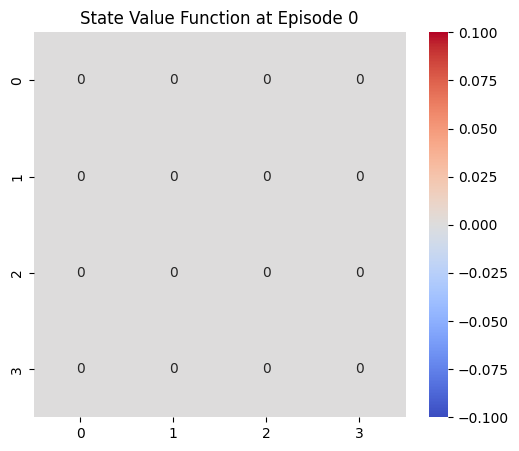

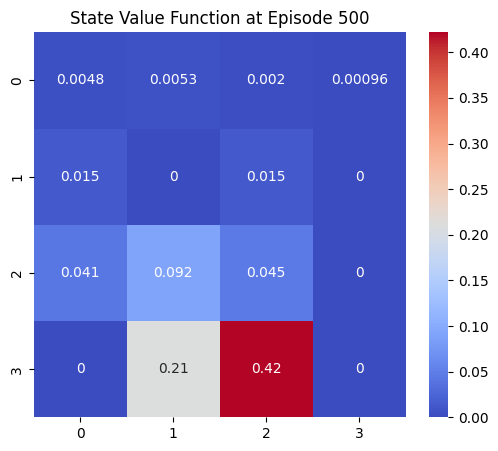

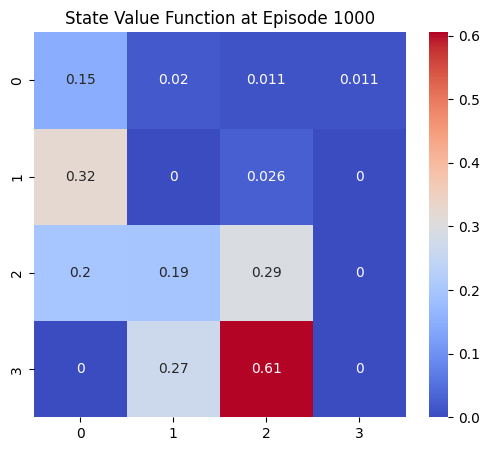

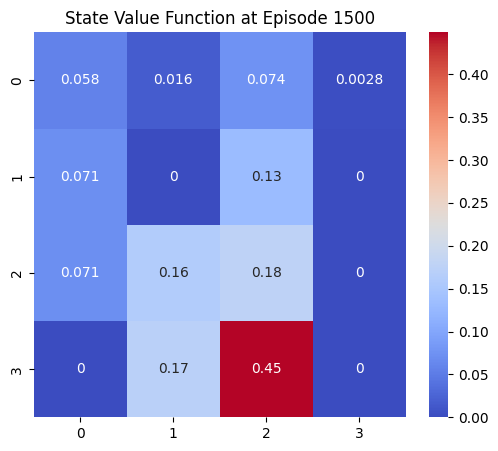

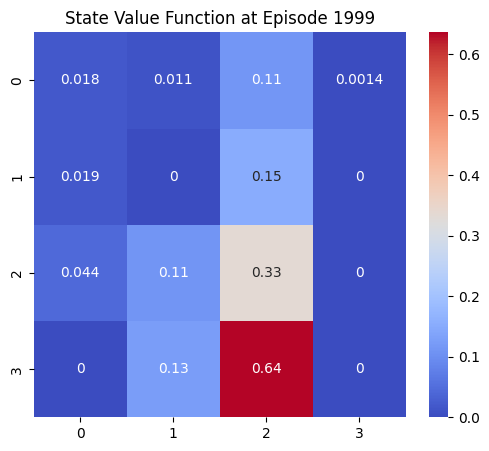

Final Learned Value Function:
[0.01792406 0.01062341 0.1122308  0.0014441  0.01941176 0.
 0.15173062 0.         0.04434023 0.10981779 0.33349874 0.
 0.         0.12646102 0.63653953 0.        ]


In [34]:
class TDnAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, n=5):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.n = n  # Number of steps for TD(n)
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = int(np.sqrt(env.observation_space.n)) 

    def policy(self, state):
        """Purely random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

    def train(self, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            state = self.env.reset()[0]
            done = False
            states, rewards = [], []

            while not done:
                action = self.policy(state)
                next_state, reward, done, _, _ = self.env.step(action)

                states.append(state)
                rewards.append(reward)

                # TD(n)
                if len(states) >= self.n:
                    G = sum([self.gamma ** i * rewards[i] for i in range(self.n)])  # Compute return
                    G += self.gamma ** self.n * self.V[next_state]  # Bootstrapped return
                    self.V[states[0]] += self.alpha * (G - self.V[states[0]])

                    # Remove first state and reward from buffer
                    states.pop(0)
                    rewards.pop(0)

                state = next_state  # Move to next state

            # Final updates for remaining steps
            while len(states) > 0:
                G = sum([self.gamma ** i * rewards[i] for i in range(len(rewards))])
                self.V[states[0]] += self.alpha * (G - self.V[states[0]])
                states.pop(0)
                rewards.pop(0)

            # Visualize every few episodes
            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(6, 5))
        sns.heatmap(self.V.reshape(self.grid_size, self.grid_size), annot=True, cmap="coolwarm", cbar=True)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)  
    def get_value_function(self):
        return self.V


env = gym.make("FrozenLake-v1", is_slippery=False)
agent = TDnAgent(env, n=10)  

# Train the agent
agent.train(episodes=2000, visualize_interval=500)

# Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())


#### Cliff Walker

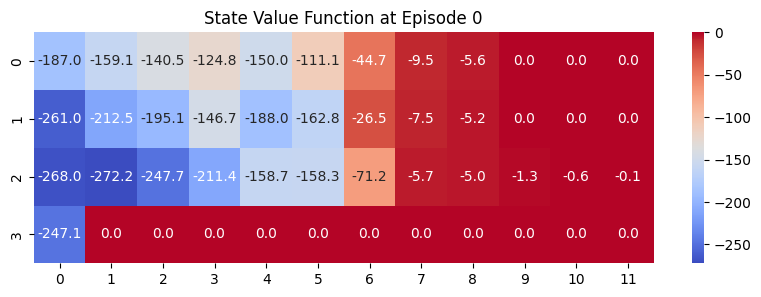

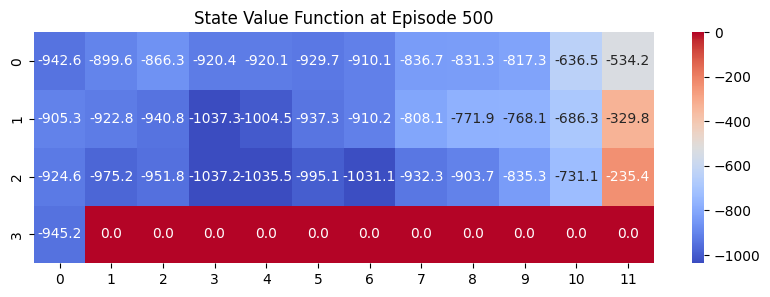

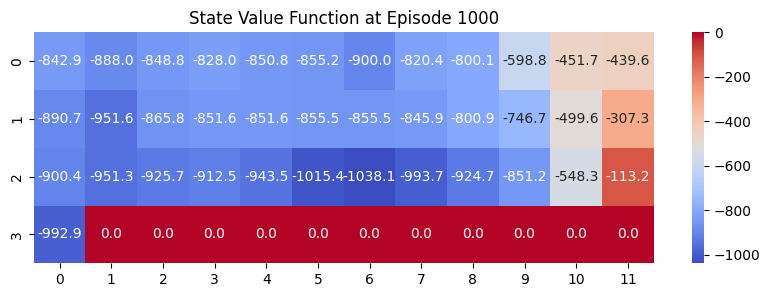

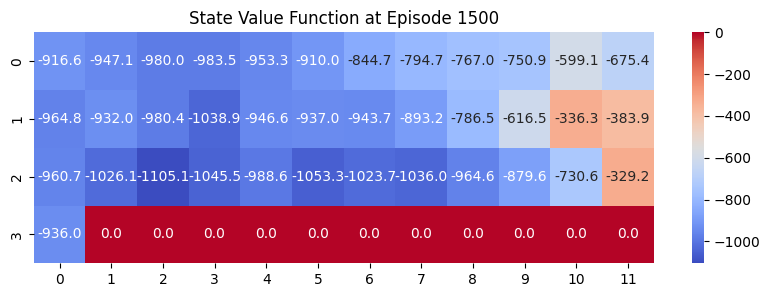

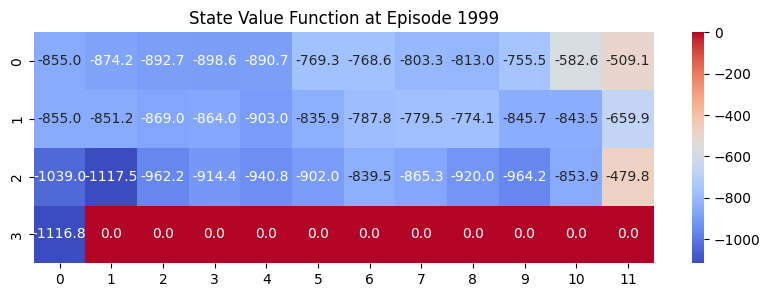

Final Learned Value Function:
[ -854.95600295  -874.15172272  -892.66845242  -898.58851167
  -890.73423637  -769.33998891  -768.6376345   -803.27968859
  -813.02657271  -755.50644711  -582.60865161  -509.07441734
  -854.95805039  -851.23256227  -869.02605717  -864.03564374
  -902.98492906  -835.94229812  -787.75510513  -779.46612273
  -774.12160036  -845.7219228   -843.45713953  -659.94485018
 -1038.97100359 -1117.47872079  -962.20818941  -914.44224743
  -940.77659421  -902.01050327  -839.47089515  -865.34224663
  -920.00947256  -964.22177509  -853.85402708  -479.76497715
 -1116.77966687     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.        ]


In [35]:
class TDnAgent:
    def __init__(self, env, grid_size, alpha=0.1, gamma=0.99, n=5):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.n = n  # Number of steps for TD(n)
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = grid_size 

    def policy(self, state):
        """Purely random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

    def train(self, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            state = self.env.reset()[0]
            done = False
            states, rewards = [], []

            while not done:
                action = self.policy(state)
                next_state, reward, done, _, _ = self.env.step(action)

                states.append(state)
                rewards.append(reward)

                # TD(n) Update
                if len(states) >= self.n:
                    G = sum([self.gamma ** i * rewards[i] for i in range(self.n)])  # Compute return
                    G += self.gamma ** self.n * self.V[next_state]  # Bootstrapped return
                    self.V[states[0]] += self.alpha * (G - self.V[states[0]])

                    # Remove first state and reward from buffer
                    states.pop(0)
                    rewards.pop(0)

                state = next_state  # Move to next state

            # Final updates for remaining steps
            while len(states) > 0:
                G = sum([self.gamma ** i * rewards[i] for i in range(len(rewards))])
                self.V[states[0]] += self.alpha * (G - self.V[states[0]])
                states.pop(0)
                rewards.pop(0)

            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(10, 3)) 
        sns.heatmap(self.V.reshape(self.grid_size), annot=True, fmt = ".1f", cmap="coolwarm", cbar=True)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)  

    def get_value_function(self):
        return self.V


env = gym.make("CliffWalking-v0")
grid_size = env.unwrapped.shape 

agent = TDnAgent(env, grid_size, n=10)  

# Train the agent
agent.train(episodes=2000, visualize_interval=500)

# Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())


------------